**1. 데이터 불러오기**
- 라이브러리 설치
    - Pandas: 데이터 처리
    - matplotlib.pyplot: graph visualization
    - seaborn: heatmap 제작
- 라이브러리 import
- 파일 import (경로 지정 -> 파일 불러오기)

In [1]:
# 라이브러리 설치
!pip install pandas
!pip install matplotlib
!pip install seaborn

# 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로 지정
file_path = "/Users/wonuseo/Desktop/data_exercise/titanic.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)

**2. 데이터 크기 확인**
- Rows: 데이터 개수
- Columns: 데이터 종류
- df.columns: 종류들의 이름...
- df.types: 각 데이터들의 저장방식?

In [2]:
# 데이터 크기 확인
# 여기서 df는 dataframe을 의미.
print("(Rows, Columns) = ", df.shape)
print("Rows = ",df.shape[0])
print("Columns = ",df.shape[1])

# column head 추출
print(df.columns)
print(df.dtypes)

(Rows, Columns) =  (891, 12)
Rows =  891
Columns =  12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
# 데이터 생김새 파악
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. column별 null 값 확인
- 총 row 개수 중
- df.isnull().sum() -> isnull을 통해 결측치인 경우 True=1을 출력 -> sum()을 통해 합산하여 확인하는 방식
    - true = 1, false = 0 으로 true 값을 더함
- 여기서 .으로 연결하는 것은 method chaining으로 좌측 명력어부터 순차적으로 실행

In [4]:
# 전체 집합 확인
print("데이터 개수: ", df.shape[0])

# null값(결측치) 파악
print(df.isnull().sum())

데이터 개수:  891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


4. 성별 Column의 통계치 파악, Bar Plot으로 그려보기
- value_counts(): 고유값이 몇 번 나왔는지 확인

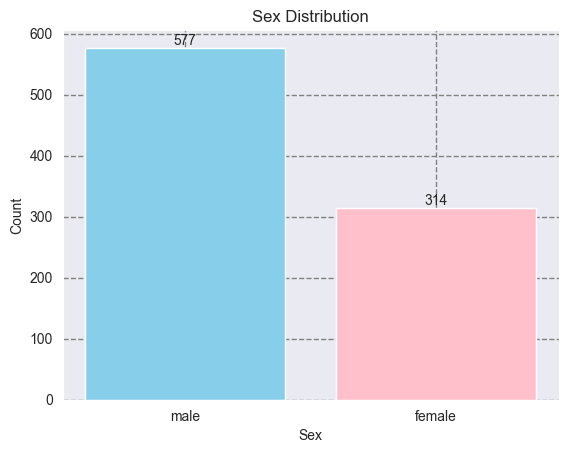

Sex
male      577
female    314
Name: count, dtype: int64


In [5]:
# 1. 데이터 준비
counts = df['Sex'].value_counts()
labels = counts.index #Male, Female
values = counts.values #577, 314

# 2. bar 그래프 그리기
plt.bar(labels, values, color=['skyblue', 'pink']) #plt.bar(x, y, 디자인)

# 3. 제목과 라벨
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

# 4. 보조선 + 눈금
plt.grid(True, linestyle='--', linewidth=1.0, color='gray')
plt.yticks(range(0, int(counts.max()) + 100, 100))

# 5. 막대 위에 숫자 표시
for i in range(len(values)):
    plt.text(i, values[i] + 5, str(values[i]), ha='center') #plt.text(x, y, data, 정렬)

# 6. 그래프 출력
plt.show()
print(counts)

In [6]:
len(values)

2

5. Age 평균 파악
- f"{값: 2f}"를 통해 소수점 컨트롤
- df['Age'].mean() : dataframe에서 Age의 평균을 구해라

In [7]:
# 평균 Age 계산. 소숫점 둘째 자리까지

print(f"평균 Age: {df['Age'].mean():.2f}")

평균 Age: 29.70


6. Fare와 Age의 상관관계 분석
- Scatter Plot
- Correlation : corr()

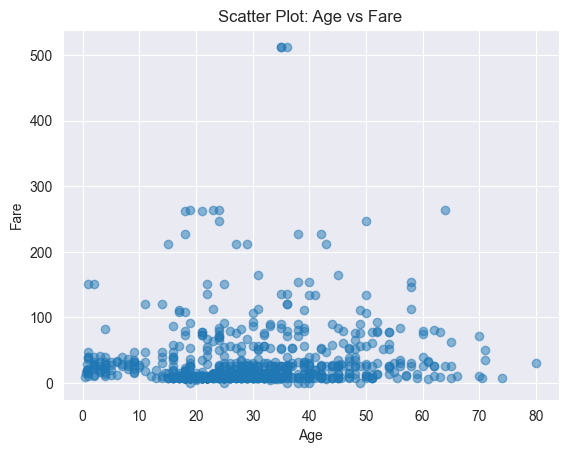

Fare와 Age의 상관계수: 0.10


In [8]:
# Scatter Plot 작성
plt.scatter(df['Age'], df['Fare'], alpha=0.5) #plt.scatter(x, y, design)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.grid(True)
plt.show()

# 상관관계 분석
# corr 변수를 Age와 Fare 두 개를. corr를 본다. 2x2 Matrix
corr = df[['Age', 'Fare']].corr().iloc[0, 1]
print(f"Fare와 Age의 상관계수: {corr:.2f}")

/var/folders/28/761115bx55q0bkv5lvth1sgc0000gn/T/ipykernel_70412/2981673558.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_age_and_fare.groupby('age_group')[['Age', 'Fare']].mean().reset_index()


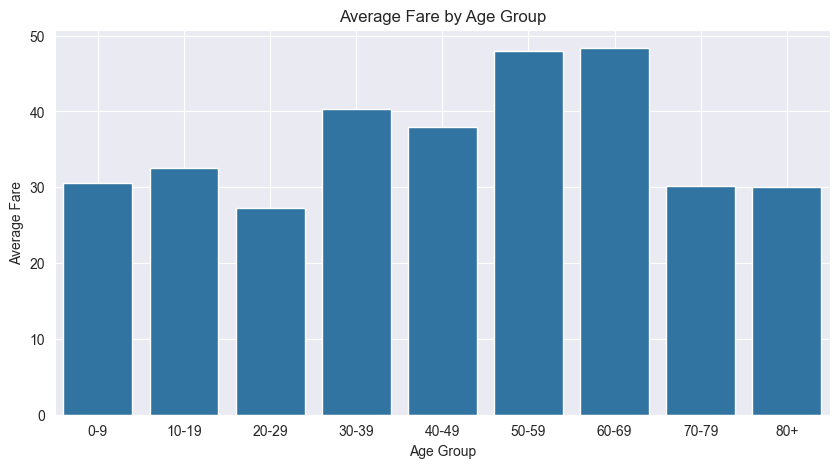

📌 그룹 평균 기준 상관계수 (age vs fare): 0.25


In [9]:
# age, fare 열 중 결측치 제거
df_age_and_fare = df[['Age', 'Fare']].dropna()

# 10세 단위로 age 그룹핑 (0–10, 11–20, ..., 80+)
bins = list(range(0, 81, 10)) + [150]  # 150세 이상은 마지막 그룹으로 처리
labels = [f'{i}-{i+9}' for i in range(0, 80, 10)] + ['80+']
df_age_and_fare['age_group'] = pd.cut(df_age_and_fare['Age'], bins=bins, labels=labels, right=False)

# 각 그룹별 평균 age와 평균 fare 계산
grouped = df_age_and_fare.groupby('age_group')[['Age', 'Fare']].mean().reset_index()

# 시각화: age_group별 fare 평균
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x='age_group', y='Fare')
plt.title('Average Fare by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Fare')
plt.grid(True)
plt.show()

# 상관계수 계산 (평균 age vs 평균 fare)
correlation = grouped['Age'].corr(grouped['Fare'])
print(f"📌 그룹 평균 기준 상관계수 (age vs fare): {correlation:.2f}")

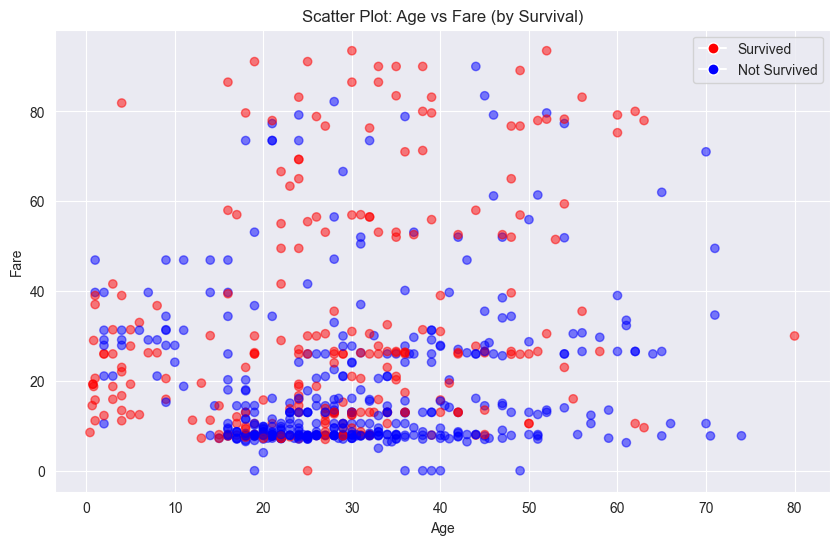

📌 Fare와 Age의 상관계수: 0.16


In [10]:
# 필요한 컬럼만 선택하고 결측치 제거
df_a_and_f_and_s = df[['Age', 'Fare', 'Survived']].dropna()
df_a_and_f_and_s = df[df['Fare'] <= 100]

# 색상 설정: 생존 여부에 따라 색상 다르게
colors = df_a_and_f_and_s['Survived'].map({1: 'red', 0: 'blue'})

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_a_and_f_and_s['Age'], df_a_and_f_and_s['Fare'], c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare (by Survival)')
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Survived', markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Not Survived', markerfacecolor='blue', markersize=8)
])
plt.show()

# 상관계수 계산
corr = df_a_and_f_and_s[['Age', 'Fare']].corr().iloc[0, 1]
print(f"📌 Fare와 Age의 상관계수: {corr:.2f}")

# 7. Ticket unique value 파악
- 전체 집합: df.shape[0]
- unique value: df['Ticket'].nunique()
    - nunique(): 고유 개수
    - unique(): 고유 값 목록
    - value_counts(): 각 값 개수 (sex bar plot 제작시 활용)

In [11]:
print("Rows 개수: ", df.shape[0])

#Unique value의 값 개수 확인
print("고유 개수: ", df['Ticket'].nunique())

print("공유 티켓 수: ", df.shape[0]-df['Ticket'].nunique())

print("Ticket")

# 1. 티켓별 사용 인원 수
ticket_counts = df['Ticket'].value_counts()

# 2. 각 티켓당 '사용된 인원 수'별로 몇 개의 티켓이 있었는지
group_size_distribution = ticket_counts.value_counts().sort_index()

# 3. 인원 수로 다시 풀어 쓰기
for group_size, ticket_count in group_size_distribution.items():
    total_people = group_size * ticket_count
    print(f"{group_size}명 중복된 티켓: {ticket_count}개 → 총 {total_people}명")

Rows 개수:  891
고유 개수:  681
공유 티켓 수:  210
Ticket
1명 중복된 티켓: 547개 → 총 547명
2명 중복된 티켓: 94개 → 총 188명
3명 중복된 티켓: 21개 → 총 63명
4명 중복된 티켓: 11개 → 총 44명
5명 중복된 티켓: 2개 → 총 10명
6명 중복된 티켓: 3개 → 총 18명
7명 중복된 티켓: 3개 → 총 21명


In [12]:
print(df['SibSp'].unique())

sibsp_counts = df['SibSp'].value_counts().sort_index()

for sibsp, count in sibsp_counts.items():
    print(f"동행자 {sibsp}명인 승객 수: {count}명") #여기서 동행자는 Siblings or Spouse

[1 0 3 4 2 5 8]
동행자 0명인 승객 수: 608명
동행자 1명인 승객 수: 209명
동행자 2명인 승객 수: 28명
동행자 3명인 승객 수: 16명
동행자 4명인 승객 수: 18명
동행자 5명인 승객 수: 5명
동행자 8명인 승객 수: 7명


In [13]:
print(df['Parch'].unique())

parch_counts = df['Parch'].value_counts().sort_index()

for parch, count in parch_counts.items():
    print(f"동행자 {parch}명인 승객 수: {count}명") #여기서 동행자는 Parents or Children

[0 1 2 5 3 4 6]
동행자 0명인 승객 수: 678명
동행자 1명인 승객 수: 118명
동행자 2명인 승객 수: 80명
동행자 3명인 승객 수: 5명
동행자 4명인 승객 수: 4명
동행자 5명인 승객 수: 5명
동행자 6명인 승객 수: 1명


In [14]:
df[df['Name'].str.contains("Hocking|Richard", case=False, na=False)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.00,0,0,A/4. 39886,7.8000,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.00,0,1,35281,77.2875,D26,S
135,136,0,2,"Richard, Mr. Emile",male,23.00,0,0,SC/PARIS 2133,15.0458,NaN,C
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.00,2,3,29106,18.7500,NaN,S
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.00,1,0,3460,7.0458,NaN,S


In [15]:
# 1. 결측치 제거
valid_cabin = df['Cabin'].dropna()

# 2. 첫 글자(Deck) 추출
df['Deck'] = df['Cabin'].dropna().apply(lambda x: x[0])

# 3. Deck별 인원 수
deck_counts = df['Deck'].value_counts().sort_index()
print(deck_counts)


Deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: count, dtype: int64


In [16]:
valid_embarked = df['Embarked'].dropna()
embarked_count = df['Embarked'].value_counts().sort_index()
print(embarked_count)

Embarked
C    168
Q     77
S    644
Name: count, dtype: int64


8. Survival & 여러 값 상관관계 분석
- 가설을 만들어준다면...
    - Pclass: Passenger's class 가 높을수록 생존
        -  True: 뚜렷한 상관관계를 보여주는 듯
    - Sex: 여자일수록 생존
        - True: 남자에 비해 월등히 높은 생존률
    - Age: 나이가 어릴수록 생존
        - Partially True: 0-10세는 명확하게 생존 비율이 높지만
        - 11세 - 60세는 유의미하지 않음.
        - 61세 이상에서는 길게 뽑히는데 이유는 ...?
    - SibSp: Number of siblings or spouses가 많을수록 생존
    - Parch: Number of parents or children이 많을수록 생존
    - Ticket: 같이 탄 사람이 많을수록 생존
    - Fare: 비싸게 주고 탈수록 생존
        -  True: Pclass와 같은 느낌

- 의미 없는 가설
    - Name: 이름의 길이가 길수록 생존
    - Cabin은 결측치가 너무 많아서 활용 불가
    - Embarked: 어디서 탔는 뭔 상관


전체 생존 비율: 38.38%


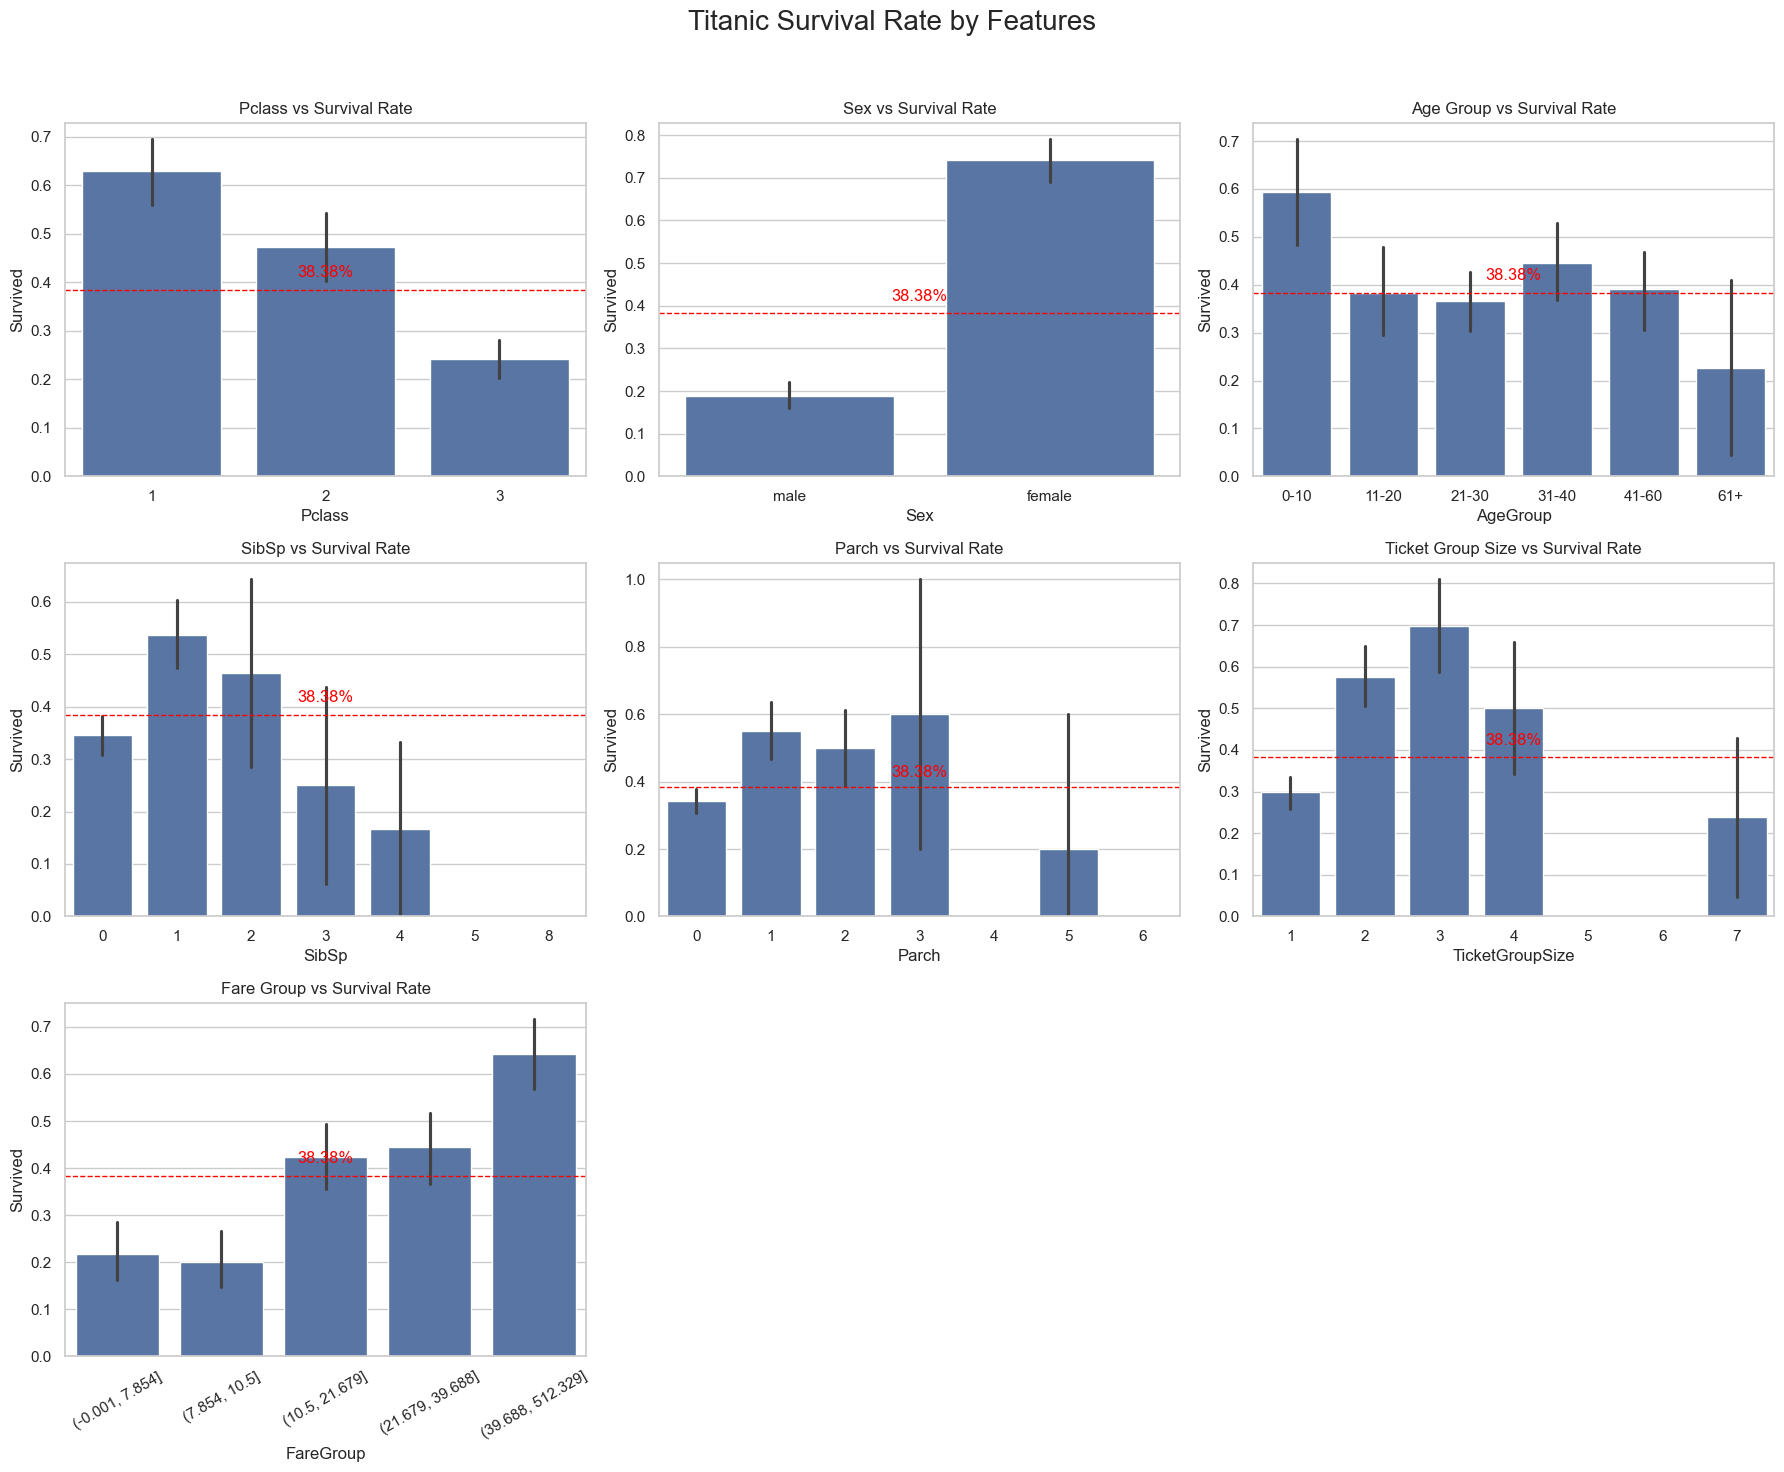

In [17]:
# 전체 생존 비율 계산
survival_rate = df['Survived'].mean()

# 시각화 스타일
sns.set(style="whitegrid")

print(f"전체 생존 비율: {survival_rate:.2%}")

# Age Group 구간 생성
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 60, 80], labels=['0-10','11-20','21-30','31-40','41-60','61+'])

# Fare Group 구간 생성
df['FareGroup'] = pd.qcut(df['Fare'], 5)

# Ticket 그룹 크기 계산
df['TicketGroupSize'] = df.groupby('Ticket')['Ticket'].transform('count')

# 그래프 출력
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Titanic Survival Rate by Features", fontsize=20)

# 공통 기준선 함수
def add_baseline(ax):
    ax.axhline(survival_rate, color='red', linestyle='--', linewidth=1)
    ax.text(0.5, survival_rate + 0.02, f"{survival_rate:.2%}", color='red', ha='center', va='bottom', transform=ax.get_yaxis_transform())

# 1. Pclass
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Pclass vs Survival Rate")
add_baseline(axes[0, 0])

# 2. Sex
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Sex vs Survival Rate")
add_baseline(axes[0, 1])

# 3. Age
sns.barplot(x='AgeGroup', y='Survived', data=df, ax=axes[0, 2])
axes[0, 2].set_title("Age Group vs Survival Rate")
add_baseline(axes[0, 2])

# 4. SibSp
sns.barplot(x='SibSp', y='Survived', data=df, ax=axes[1, 0])
axes[1, 0].set_title("SibSp vs Survival Rate")
add_baseline(axes[1, 0])

# 5. Parch
sns.barplot(x='Parch', y='Survived', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Parch vs Survival Rate")
add_baseline(axes[1, 1])

# 6. Ticket Group Size
sns.barplot(x='TicketGroupSize', y='Survived', data=df, ax=axes[1, 2])
axes[1, 2].set_title("Ticket Group Size vs Survival Rate")
add_baseline(axes[1, 2])

# 7. Fare Group
sns.barplot(x='FareGroup', y='Survived', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Fare Group vs Survival Rate")
axes[2, 0].tick_params(axis='x', rotation=30)
add_baseline(axes[2, 0])

# 나머지 subplot 비우기
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- 데이터를 섞어 본다면...
    - Possible Scenarios: 혼자 탔거나 가족 단위로 뭉쳐 있었을거고...
      - Case 1) 가족 전체가 살거나
      - Case 2) 가족 전체 중 일부(여성, 아이)만 살거나
      - Case 3) 가족 전체가 죽거나
      - Case 4) 혼자 탔다면? 생존 후순위일까 선순위일까 무관할까?

    - 가설로 정리해본다면...
       - [가설 1] 가족 구성원 중 여성이나 아동이 포함된 그룹은 생존률이 유의하게 높다.
            - 아이가 있는 경우 생존률이 높아졌을까?
                - 아이만 살았을까?
                - 아이와 여성이 살았을까?
            - 여성이 있는 경우 생존률이 높아졌을까?
                - 여성만 살았을까?
            - 아이와 여성이 없어도 생존률이 높을까?
            - 아이와 여성이 있어도 남성만 살았을 수도 있을까?
       - [가설 2] 가족 단위로 함께 탑승했더라도, 모두 생존하거나 모두 사망한 경향이 높다.
       - [가설 3] 혼자 탑승한 승객의 생존률은 사회적 기준 (성별, 나이) 에 따라 다르게 영향을 받는다.


/var/folders/28/761115bx55q0bkv5lvth1sgc0000gn/T/ipykernel_70412/4088177436.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hyp3 = solo.groupby(['Sex','AgeGroup'])['Survived'].mean().unstack()


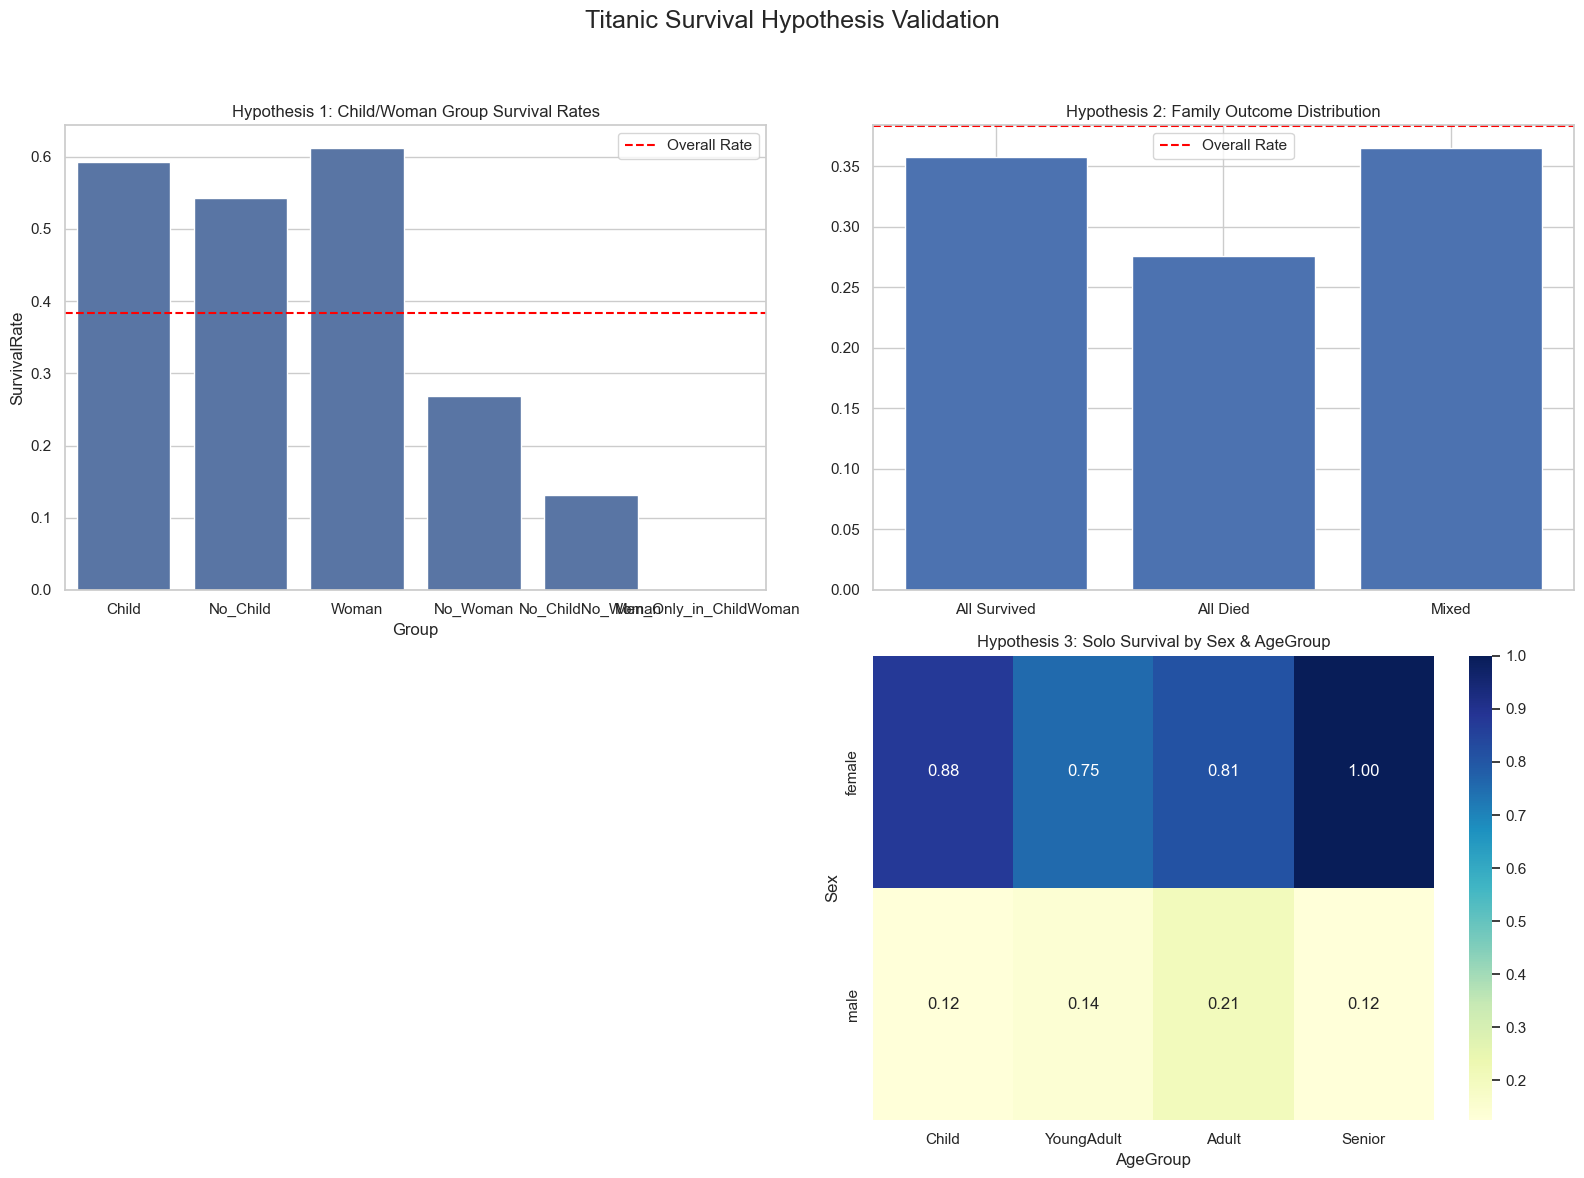

In [18]:
# 2. 파생 변수 생성
df['IsChild'] = df['Age'] < 16
df['IsWoman'] = df['Sex'] == 'female'
df['FamilySize'] = df['SibSp'] + df['Parch']

# 3. 전체 생존 비율 가이드라인
overall_survival = df['Survived'].mean()

# 4. 가족 단위만 추출 (2명 이상 그룹)
family_groups = df.groupby('Ticket').filter(lambda g: len(g) > 1).groupby('Ticket')

# 5. 가족별 통계 계산
records = []
for ticket, grp in family_groups:
    total = len(grp)
    surv = grp['Survived'].sum()
    rate = surv / total
    has_child = grp['IsChild'].any()
    has_woman = grp['IsWoman'].any()
    survivors = grp[grp['Survived'] == 1]
    records.append({
        'Ticket': ticket,
        'Total': total,
        'SurvivedCount': surv,
        'SurvivalRate': rate,
        'HasChild': has_child,
        'HasWoman': has_woman,
        'OnlyChildrenSurvived': len(survivors) > 0 and survivors['IsChild'].all() and not survivors['IsWoman'].any(),
        'OnlyWomenSurvived': len(survivors) > 0 and survivors['IsWoman'].all() and not survivors['IsChild'].any(),
        'ChildrenAndWomenSurvived': len(survivors) > 0 and survivors['IsChild'].any() and survivors['IsWoman'].any(),
        'OnlyMenSurvived': len(survivors) > 0 and not survivors['IsChild'].any() and not survivors['IsWoman'].any()
    })
family_stats = pd.DataFrame(records)

# === 가설 1: 여성/아동 포함 그룹 생존률 비교 ===
rates_h1 = {
    'Child': family_stats[family_stats['HasChild']]['SurvivalRate'].mean(),
    'No_Child': family_stats[~family_stats['HasChild']]['SurvivalRate'].mean(),
    'Woman': family_stats[family_stats['HasWoman']]['SurvivalRate'].mean(),
    'No_Woman': family_stats[~family_stats['HasWoman']]['SurvivalRate'].mean(),
    'No_ChildNo_Woman': family_stats[~family_stats['HasChild'] & ~family_stats['HasWoman']]['SurvivalRate'].mean(),
    'Men_Only_in_ChildWoman': family_stats[family_stats['HasChild'] & family_stats['HasWoman']]['OnlyMenSurvived'].mean()
}

# === 가설 2: 가족 전체 생존/사망 비율 ===
hyp2_all_survived = (family_stats['SurvivedCount'] == family_stats['Total']).mean()
hyp2_all_died = (family_stats['SurvivedCount'] == 0).mean()
hyp2_mixed = 1 - hyp2_all_survived - hyp2_all_died

# === 가설 3: 혼자 탑승자의 생존률 (성별/나이) ===
solo = df[df['FamilySize'] == 0].copy()
solo['AgeGroup'] = pd.cut(solo['Age'], bins=[0,16,30,60,100], labels=['Child','YoungAdult','Adult','Senior'])
hyp3 = solo.groupby(['Sex','AgeGroup'])['Survived'].mean().unstack()

# === 시각화 ===
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Titanic Survival Hypothesis Validation", fontsize=18)

# Hypothesis 1 시각화
h1_df = pd.Series(rates_h1).rename_axis('Group').reset_index(name='SurvivalRate')
sns.barplot(x='Group', y='SurvivalRate', data=h1_df, ax=axes[0,0])
axes[0,0].axhline(overall_survival, color='red', linestyle='--', label='Overall Rate')
axes[0,0].set_title('Hypothesis 1: Child/Woman Group Survival Rates')
axes[0,0].legend()

# Hypothesis 2 시각화
axes[0,1].bar(['All Survived','All Died','Mixed'], [hyp2_all_survived, hyp2_all_died, hyp2_mixed])
axes[0,1].axhline(overall_survival, color='red', linestyle='--', label='Overall Rate')
axes[0,1].set_title('Hypothesis 2: Family Outcome Distribution')
axes[0,1].legend()

# Hypothesis 3 시각화
sns.heatmap(hyp3, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[1,1])
axes[1,1].set_title('Hypothesis 3: Solo Survival by Sex & AgeGroup')

# 남은 subplot 비우기
axes[1,0].axis('off')

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


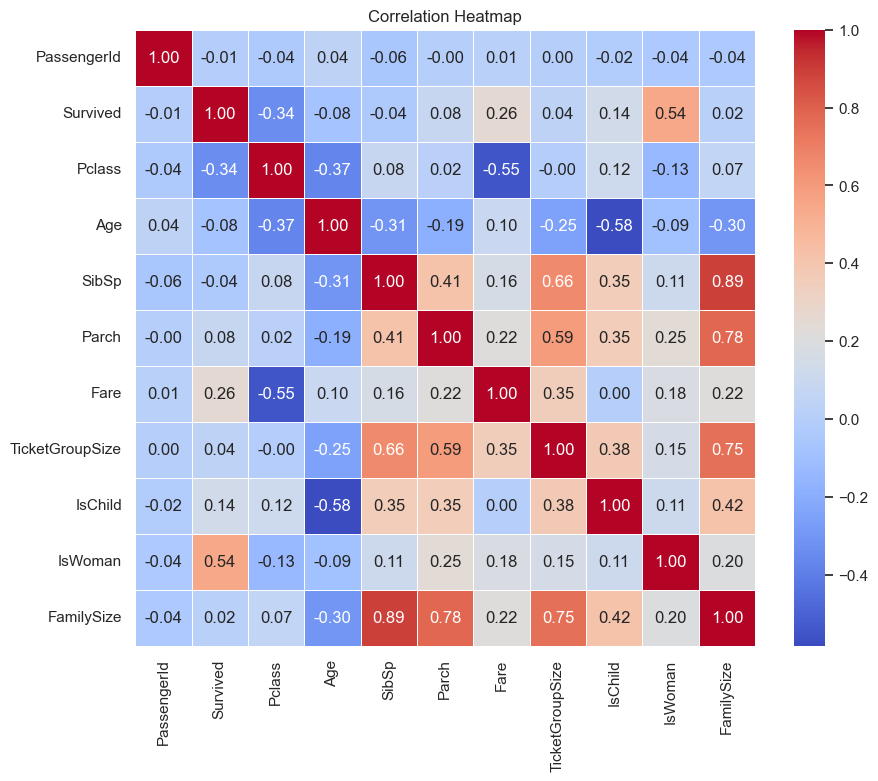

In [19]:
# 수치형 변수들 간 상관계수 행렬
corr_matrix = df.corr(numeric_only=True)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()